In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Checking in which directory we are working with OS Library)(Current Working Directory)
os.getcwd()

'C:\\Users\\sethu\\stats & ML\\Projects'

In [3]:
# Loading the DataSet into Jupyter Notebook
df = pd.read_csv('50_Startups.csv')

In [4]:
#Peeking the DataSet
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Data Preprocessing

In [5]:
#Checking For Null Values in the DataSet
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# Encoding with Label Encoding
df['State'] = df['State'].astype('category')
df['State'] = df['State'].cat.codes

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [8]:
# Checking for the different categorical values in a Feature
df['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [9]:
# Encoding- One Hot Encoding
df = pd.get_dummies(df , columns = ['State'])

In [10]:
#Peeking the DataSet - Checking for the One Hot Encoding
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
# Dropping the unwanted encoded Column(To overcome Multicollinearity)
df = df.drop(['State_0'], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [12]:
#Dividing the Independent and the Dependent variables
x = df.drop(['Profit'], axis = 1)
y = df['Profit']

In [13]:
#Checking the Independent variables
print(x.head())

   R&D Spend  Administration  Marketing Spend  State_1  State_2
0  165349.20       136897.80        471784.10        0        1
1  162597.70       151377.59        443898.53        0        0
2  153441.51       101145.55        407934.54        1        0
3  144372.41       118671.85        383199.62        0        1
4  142107.34        91391.77        366168.42        1        0


In [14]:
#Checking the Dependent variables
print(y.head())

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


<AxesSubplot:>

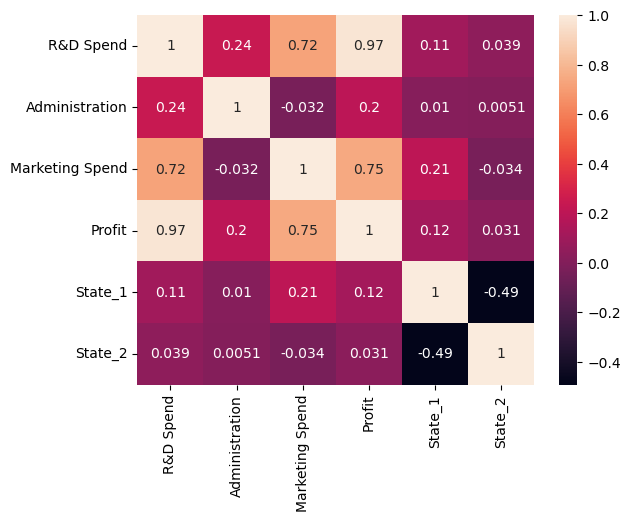

In [15]:
#Checking for the Correlation between the Dependent and Independent Features using a Heat Map
sns.heatmap(df.corr(), annot=True)

In [16]:
#Checking the Five Point Summary of the Data Set
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_1,State_2
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000


In [17]:
# Splitting the Dataset to Traing Data and Testing data using sklearn Library
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, train_size=0.75 , random_state=501)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 5)
(13, 5)
(37,)
(13,)


# Building Machine Learning Models

# 1 . Decision Tree Regressor Model

In [18]:
#Building the Decision Tree Model and fitting the model with the Training and Testing DataSet
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [19]:
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)

In [20]:
#Checking for the Accuracy of the model using R-Square Metrics
from sklearn.metrics import r2_score
print('Train Accuracy : ', r2_score(y_train, y_pred_train))
print('Test Accuracy : ',r2_score(y_test , y_pred_test))

Train Accuracy :  1.0
Test Accuracy :  0.8443626632153707


# 2.Random Forest Regressor Model

In [21]:
#Building the Random Forest Model and fitting the model with the Training and Testing DataSet
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
#Predecting the Model
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [23]:
#Checking for the Accuracy of the model using R-Square Metrics
print('Train Accuracy : ' , r2_score(y_train, y_pred_rf_train))
print('Test Accuracy : ',r2_score(y_test , y_pred_rf_test))

Train Accuracy :  0.9904094269706594
Test Accuracy :  0.8493638776425553


# 3.Linear Regression Model

In [24]:
#Building the Linear Regression Model and fitting the model with the Training and Testing DataSet
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred_lr_train = lr_model.predict(x_train)
y_pred_lr_test = lr_model.predict(x_test)

In [26]:
#Checking for the Accuracy of the model using R-Square Metrics
print('Train Accuracy : ' , r2_score(y_train, y_pred_lr_train))
print('Test Accuracy : ', r2_score(y_test , y_pred_lr_test))

Train Accuracy :  0.960389517551679
Test Accuracy :  0.8242696380420215
